# DSCI 100 Project - Section 6 Group 16 
# Minecraft project report 
## members:

|Name|Student Number|
|--------|---------|
|Clement Cheung|40162752|
|Eileen Limneus|81033300|
|Min Hyung Yoo|26944660|
|Tyler Lee|12253688|


### Project Objectives!
+ **Broad Question:** (1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

+ **Specific Question:** How does a player's tendency to revisit the PLAICraft server, and their total playtime affect their subscription status to a game-related newsletter?

In [1]:
# loading the 
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

+ relevant background information on the topic enough so that somoneone that is unfamiliar on it can understand the full report.
+ clearly state the question you tried to answer with your project
+ identify and fully describe the dataset that was used to answer the question

## Methods & Results

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
* your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
 
note: all figures should have a figure number and a legend

#### reading the data

In [2]:
session_data <- read_csv("sessions.csv")
players_data <- read_csv("players.csv")
session_data
players_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### processing session_data and merging the two dataframes

In [3]:
session_data <- session_data |> 
group_by(hashedEmail) |>
summarise(count = n()) |>
arrange(-count)
session_data

hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [4]:
final_data <- full_join(session_data, players_data, by = "hashedEmail")
final_data

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age
<chr>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,NA,Amateur,FALSE,0,Orion,Male,17
644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,NA,Amateur,TRUE,0,Rhys,Male,20
b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,NA,Amateur,TRUE,0,Bailey,Female,17


#### simple visualisation to get started

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


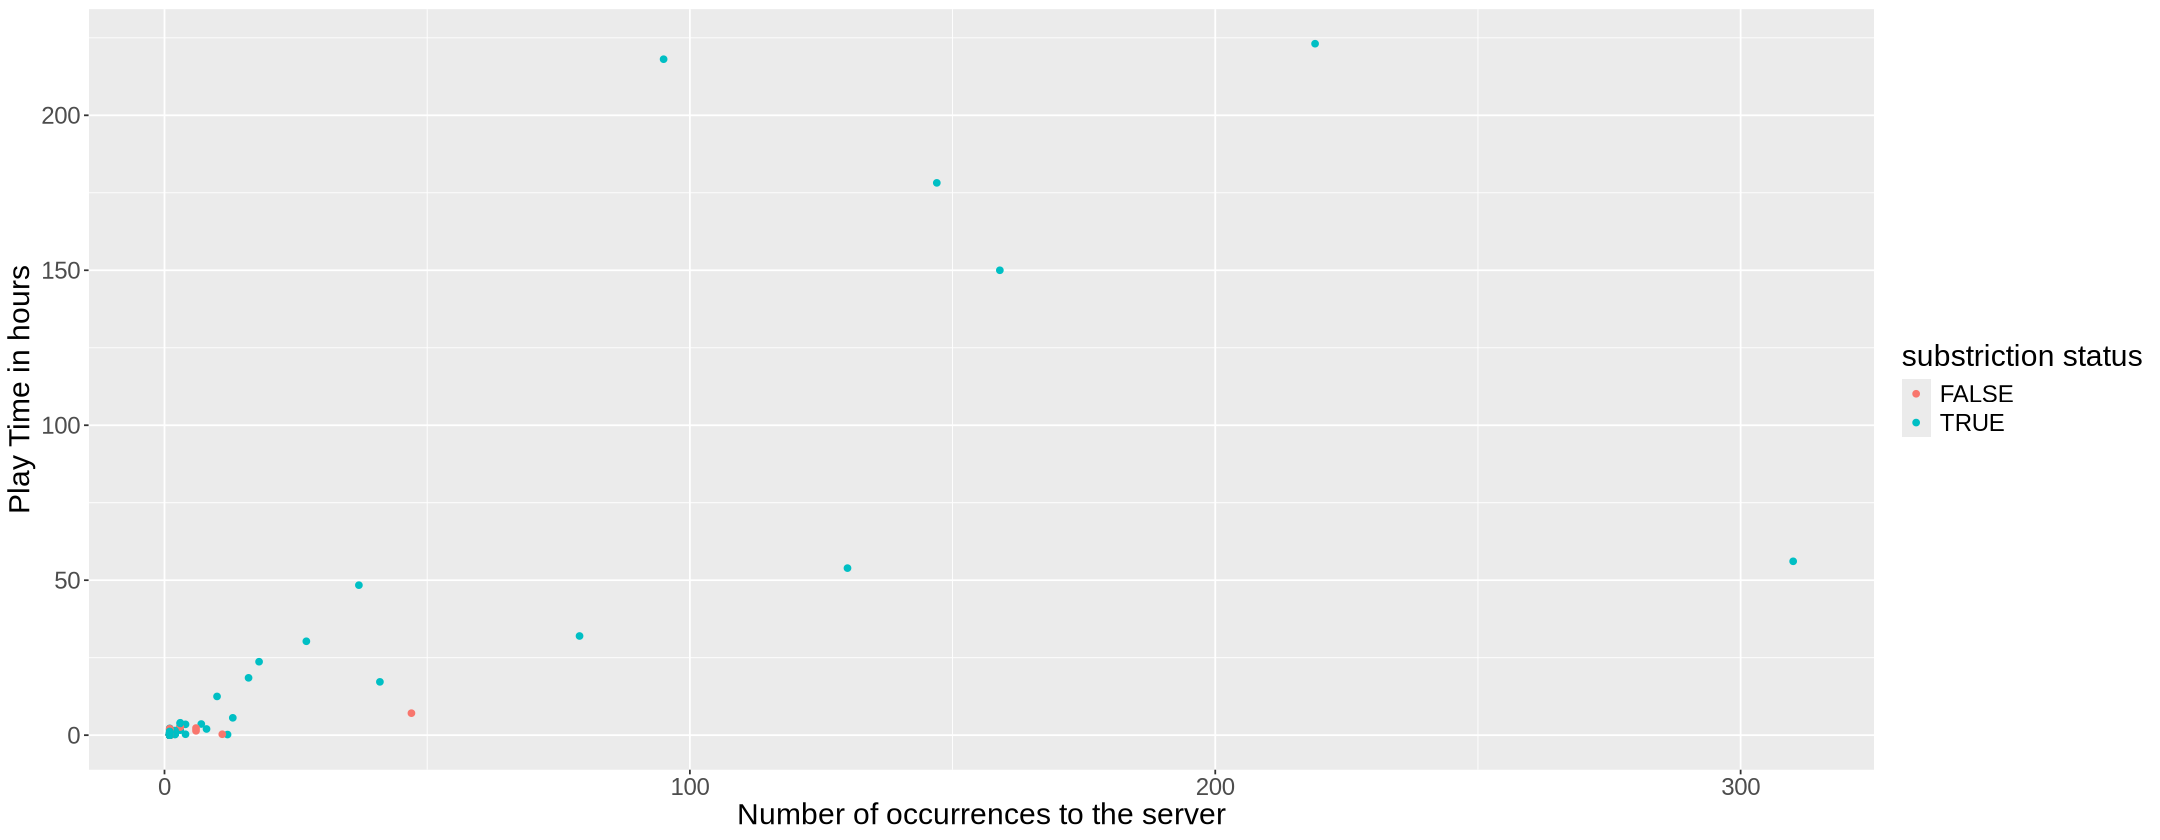

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


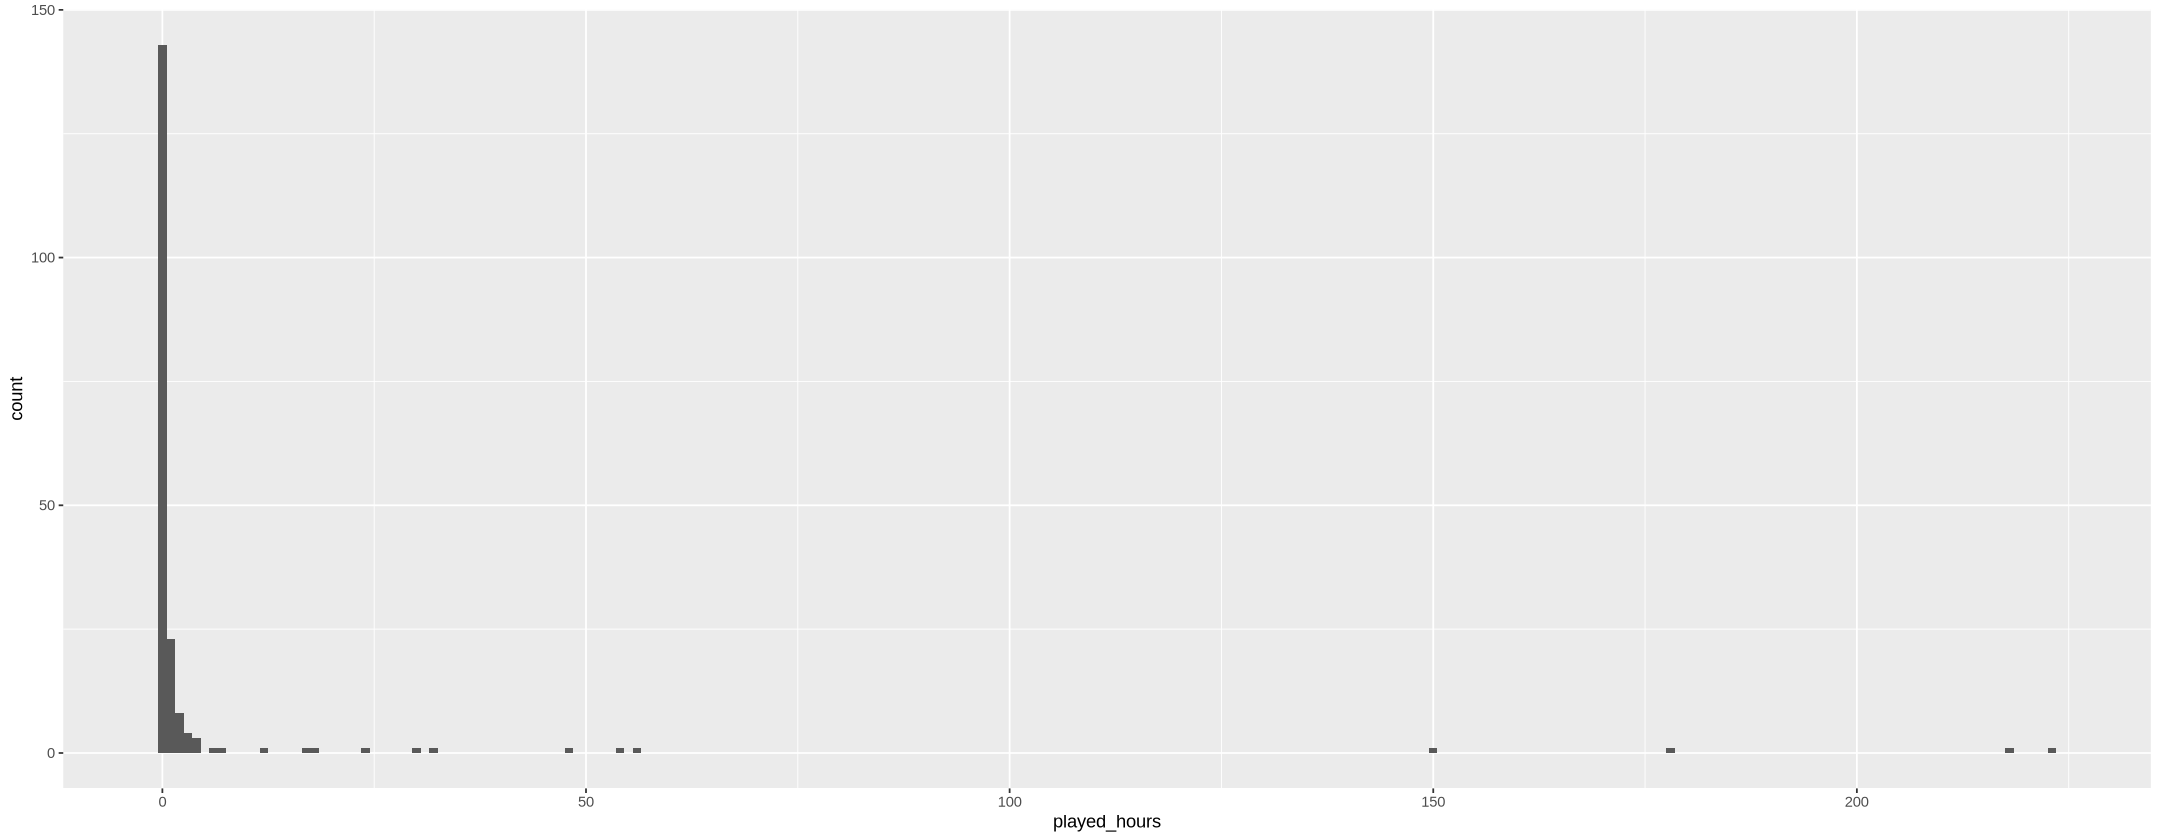

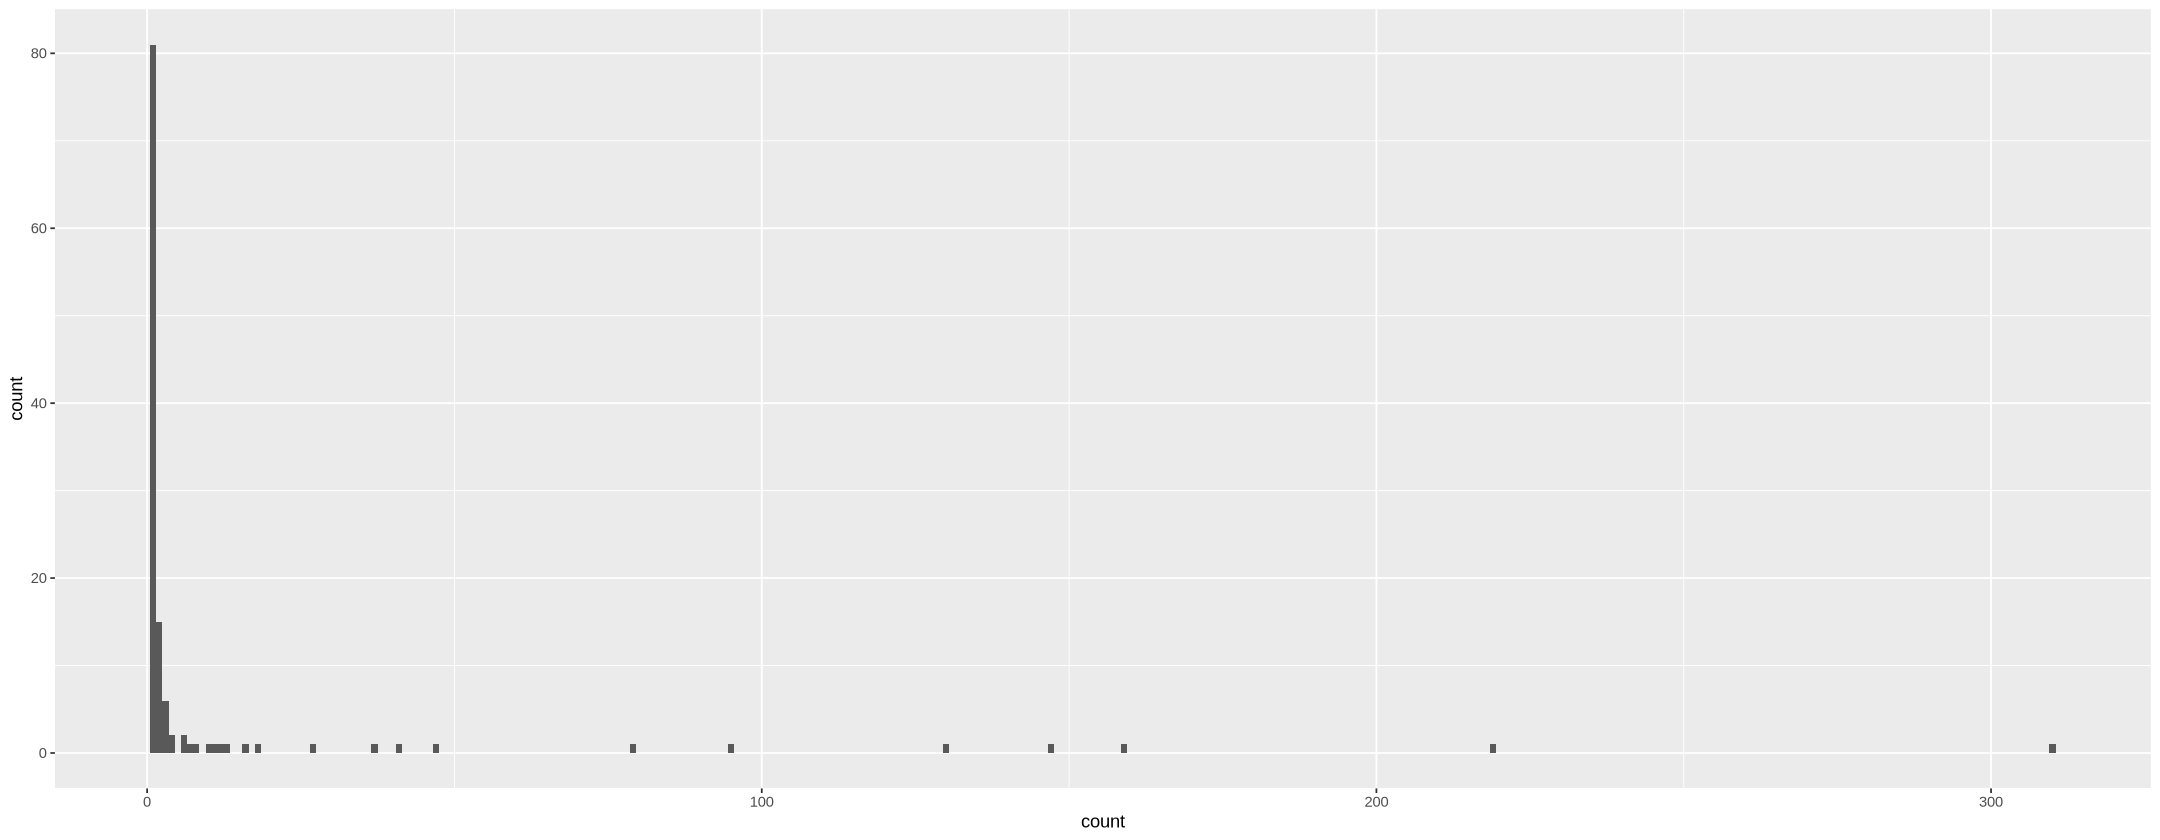

In [5]:
options(repr.plot.width = 18, repr.plot.height = 7)

final_data |>  
    ggplot(aes(x = count, y = played_hours, color = subscribe)) + 
    geom_point() + 
    xlab("Number of occurrences to the server") +
    ylab("Play Time in hours") +
    labs(color = "substriction status") +
    theme(text = element_text(size = 18))

hours_dist <- ggplot(final_data, aes(x = played_hours)) +
    geom_histogram(binwidth = 1)
occurence_dist <- ggplot(final_data, aes(x = count)) +
    geom_histogram(binwidth = 1)

hours_dist
occurence_dist

#### At this point...
Given the plot above, it's difficult to draw any conclusions on trends and patterns due to the various outliers skewing distribution. Performing a 95% confidence interval allows us to dismiss outliers and hone in on a clearer range.

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


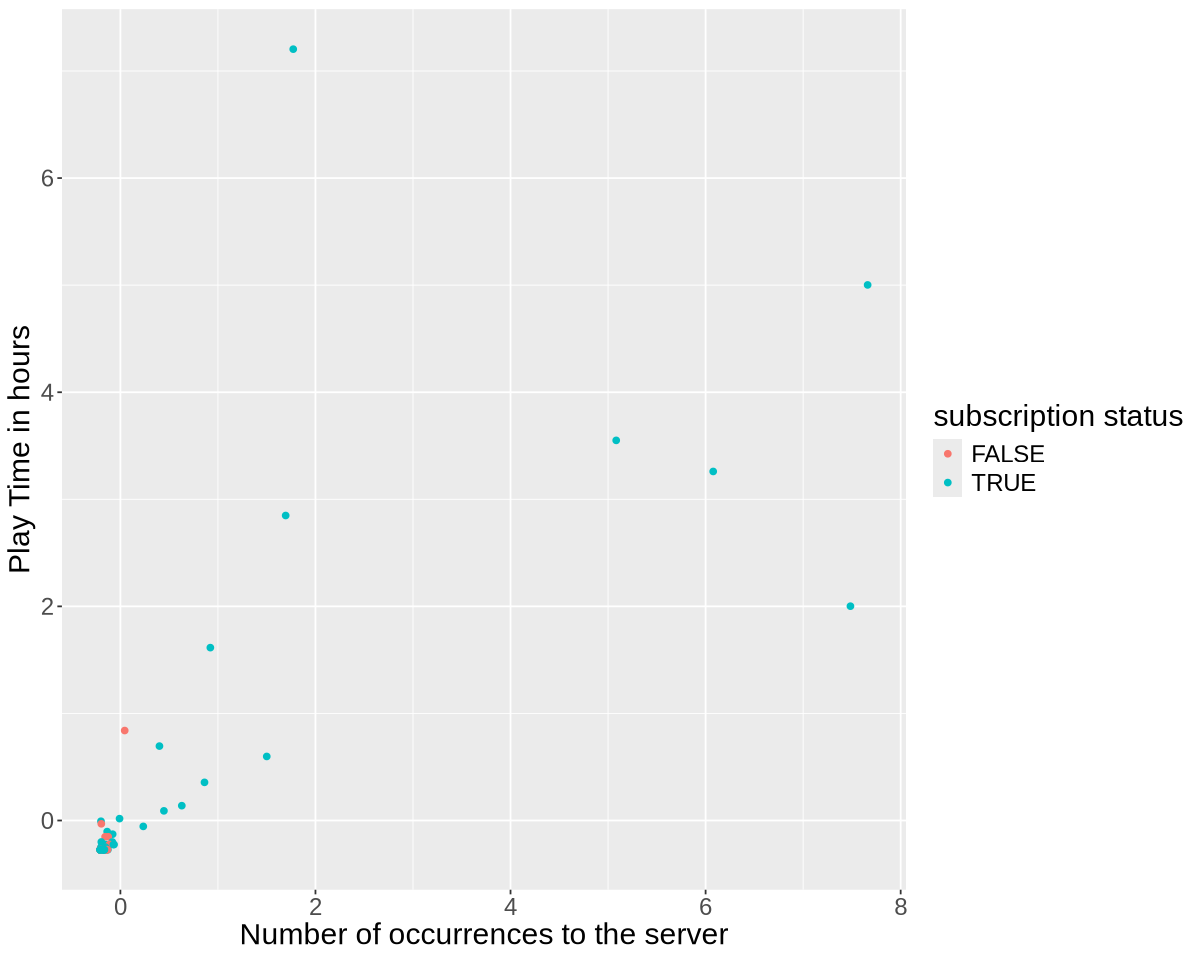

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

# the stuff below is me normalising the data, then plotting it. plotting the data still had a weird bias towards the observations too far
# im gonna follow up this cell (and its print) with some experiments with 95% confidence interval, hopefully it provides a smaller range.

subscription_class_data <- final_data |>
    mutate(subscription_status = as_factor(subscribe)) |>
    select(subscription_status, played_hours, count)

normalise_recipe <- subscription_class_data |>
    recipe(subscription_status ~ played_hours + count) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()
normalised_data <- bake(normalise_recipe, subscription_class_data)

normalised_plot <- ggplot(normalised_data, aes(x = played_hours, y = count, colour = subscription_status)) +
    geom_point() +
    xlab("Number of occurrences to the server") +
    ylab("Play Time in hours") +
    labs(color = "subscription status") +
    theme(text = element_text(size = 18))
normalised_plot

In [7]:
# trying out 95% confidence now.
#two ways: 1) t-test, 2) quartiles (the next code cell)

t_test_occurences <- t.test(final_data$count, conf.level = 0.95)
print(t_test_occurences$conf.int)

t_test_hours <- t.test(final_data$played_hours, conf.level = 0.95)
print(t_test_hours$conf.int)

[1]  4.963808 19.596192
attr(,"conf.level")
[1] 0.95
[1] 1.851171 9.840666
attr(,"conf.level")
[1] 0.95


In [8]:
# the resulting output is the 95% confidence range for where the true population mean resides
# it's therefore reasonable to estimate most players visit beteen 4.964 and 19.596 times, accumulating between 1.812 and 9.841 hours.

#im also going to do the way kinda taught in class, by using quantiles and finding the 2.5th and 97.5th percentiles

lower_bound_occurences <- quantile(final_data$count, probs = 0.025, na.rm = TRUE)
upper_bound_occurences <- quantile(final_data$count, probs = 0.975, na.rm = TRUE)

lower_bound_hours <- quantile(final_data$played_hours, probs = 0.025, na.rm = TRUE)
upper_bound_hours <- quantile(final_data$played_hours, probs = 0.975, na.rm = TRUE)

print(c(lower_bound_occurences, upper_bound_occurences))
print(c(lower_bound_hours, upper_bound_hours))

#the resulting bounds take account for ALL the data, so it includes the yucky outliers. I'm more partial to the t_test results

 2.5% 97.5% 
  1.0 145.3 
  2.5%  97.5% 
 0.000 54.175 


played_hours,count,subscribe
<dbl>,<int>,<lgl>
53.9,130,TRUE
32.0,79,TRUE
7.1,47,FALSE
⋮,⋮,⋮
1.2,1,TRUE
0.1,1,TRUE
1.1,1,TRUE


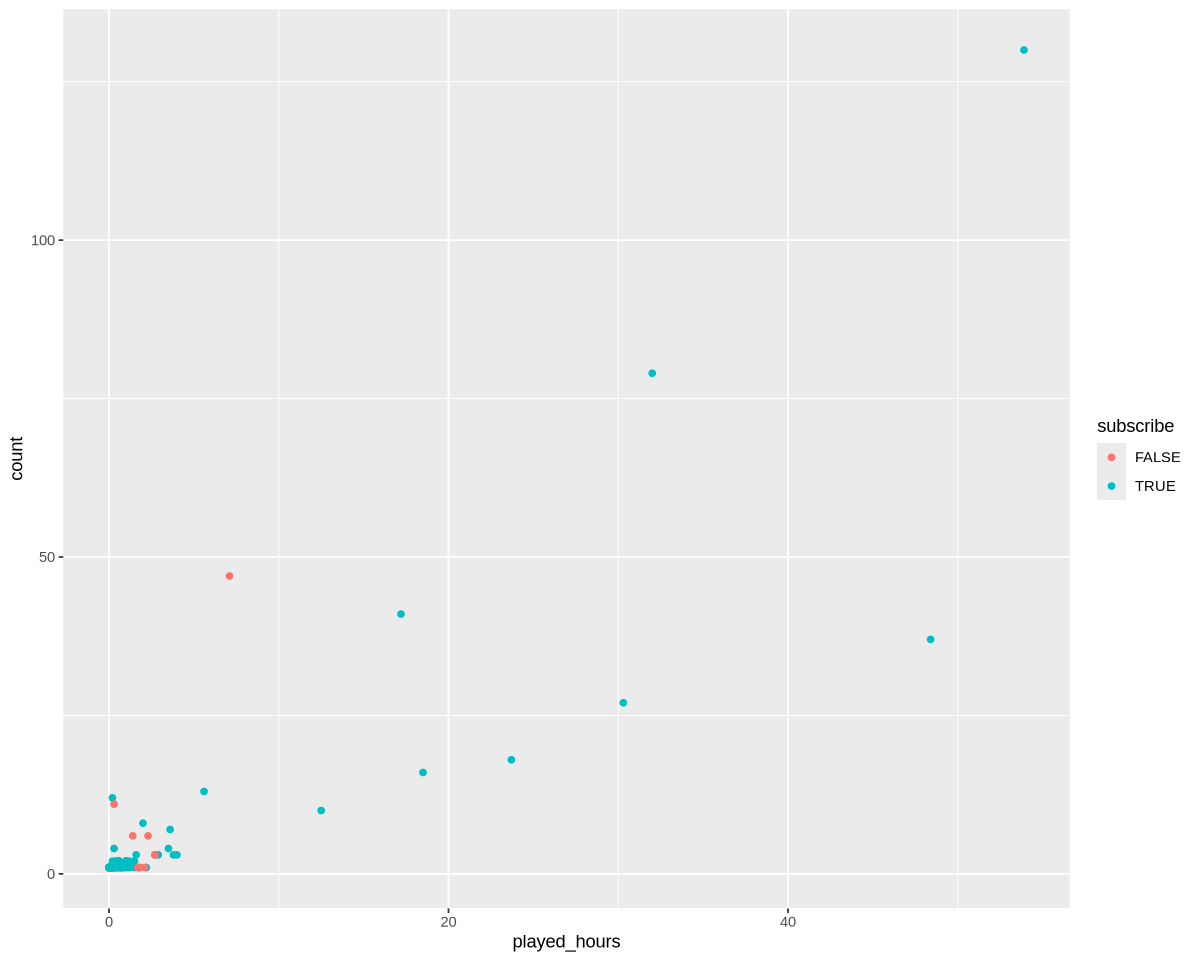

In [9]:
# knowing this we can make some new code that focuses on the range identified by the t-test

filtered_data <- final_data |>
    select(played_hours, count, subscribe) |>
    filter(1.0 <= count & count <= 145.3, 0 <= played_hours & played_hours <= 54.175)
filtered_data

# I'm commenting a version of the filtering that yields a better looking plot, its based on the upper bounds identified in the t-test

# filtered_data_draft <- final_data |>
#     select(played_hours, count, subscribe) |>
#     filter(count <= 19.596192, played_hours <= 9.840666)
# filtered_data_draft
# filtered_data_d_plot <- ggplot(filtered_data_draft, aes(x = played_hours, y = count, colour = subscribe)) +
#     geom_point() 
# filtered_data_d_plot

# if you plot the commented version, you can see how a lot of the data points are people with only one visit, and varying hours in that one sessions.
# i don't know what to make of this, but i'll try filtering out the one time visiters. we can maybe consider changing our question to focus on recurring players.

filtered_plot <- ggplot(filtered_data, aes(x = played_hours, y = count, colour = subscribe)) +
    geom_point() 
filtered_plot

played_hours,count,subscribe
<dbl>,<int>,<lgl>
56.1,310,TRUE
223.1,219,TRUE
150.0,159,TRUE
⋮,⋮,⋮
0.6,2,TRUE
0.6,2,TRUE
1.0,2,TRUE


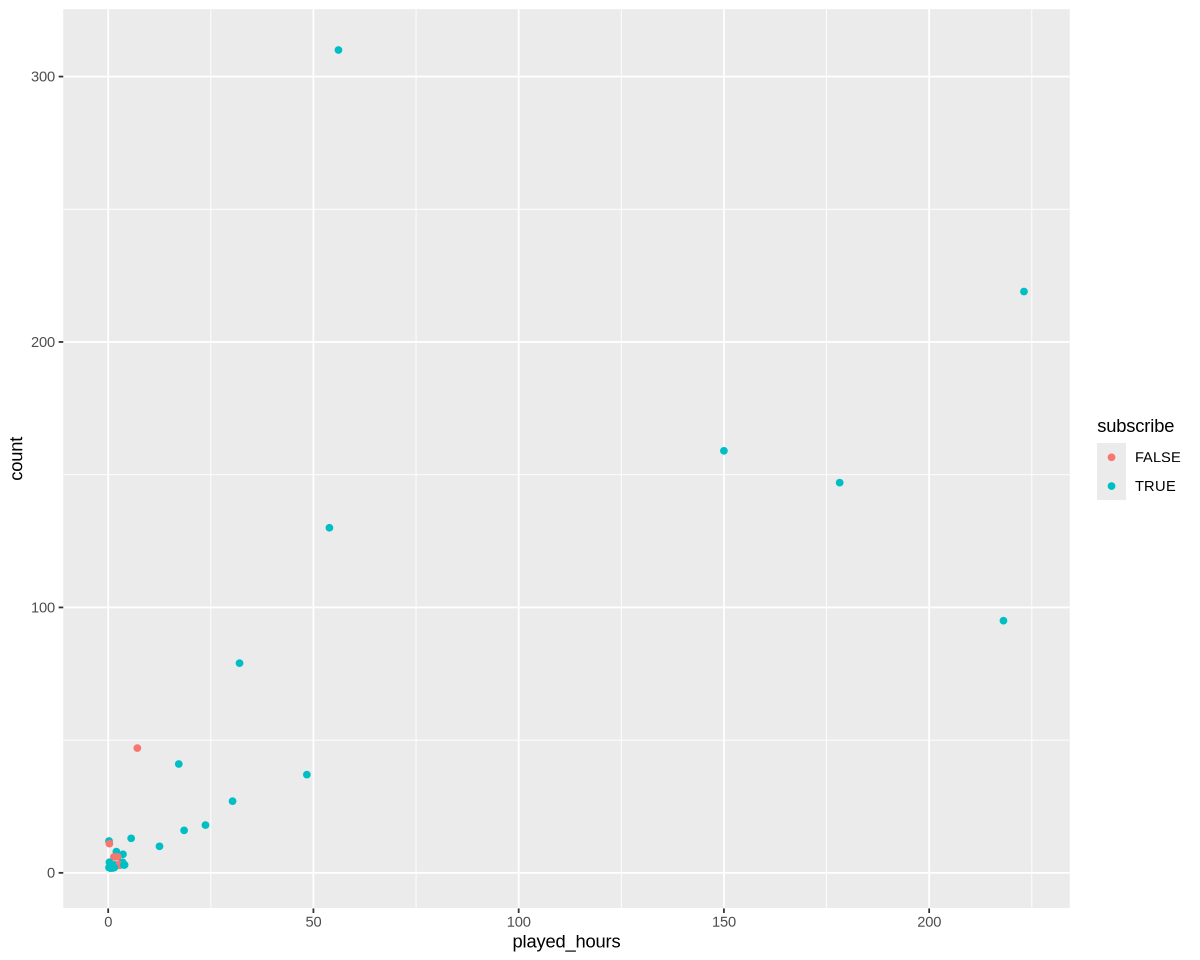

In [10]:
filtered_recurring_only <- final_data |>
    select(played_hours, count, subscribe) |>
    filter(count > 1)
filtered_recurring_only
recurring_plot <- ggplot(filtered_recurring_only, aes(x = played_hours, y = count, colour = subscribe)) +
    geom_point()
recurring_plot

# this did seem to get rid of some of the noise in the early areas, but unfortunately only 44 out of the 196 players remain.
# maybe we can consider analysing the proportion of recurring/one-time players that are subcribed?

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age,player_type,player_type_truth
<chr>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23,recurring,TRUE
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17,recurring,TRUE
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16,recurring,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,Pro,TRUE,1.2,Sakura,Male,17,onetime,TRUE
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,TRUE,0.1,Fatima,Male,17,onetime,TRUE
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,TRUE,1.1,Caden,Male,20,onetime,TRUE


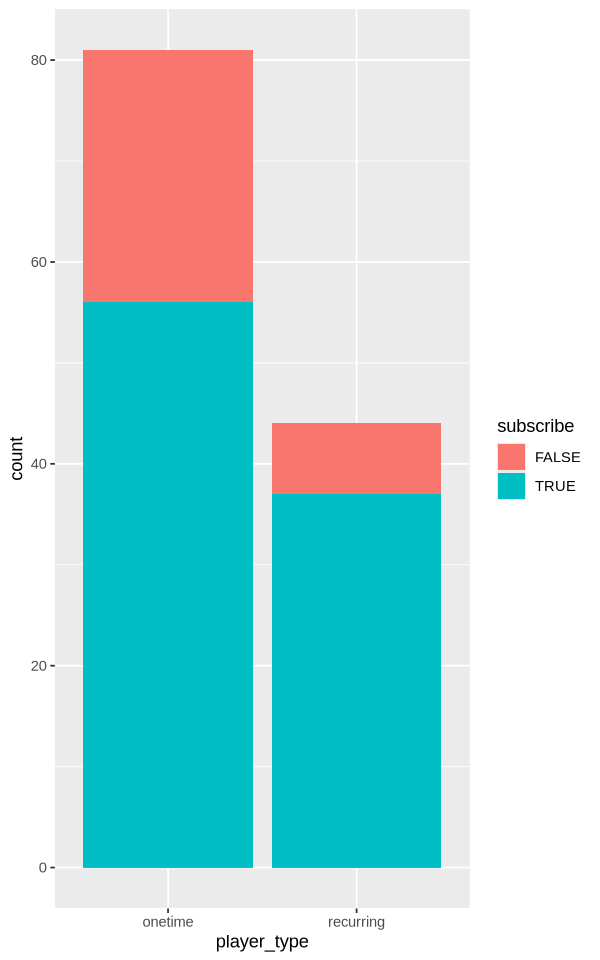

In [11]:
# here's a bar graph showing the proportion of subscribed players (one-time and recurring)
options(repr.plot.width = 5, repr.plot_height = 8)

onetime_vs_recurring_data <- final_data |>
    mutate(onetime = count == 1, recurring = count > 1) |>
    pivot_longer(cols = onetime:recurring, names_to = "player_type", values_to = "player_type_truth") |>
    group_by(player_type_truth) |> 
    filter(player_type_truth == "TRUE")
onetime_vs_recurring_data

# the above code makes a new column showing whether a player is recurring or a onetime player.
# the code also removed 71 players. These were individuals with NA as their count, and were therefore unable to be classified as recurring or onetime.

onetime_vs_recurring_plot <- ggplot(onetime_vs_recurring_data, aes(x = player_type, fill = subscribe)) +
    geom_bar(stat = "count")
onetime_vs_recurring_plot

# as you can see, recurring players ARE more likely to be subscribed. As you can tell by the higher proprtion of TRUE in recurring players.

# Classification

- Standarizing the Data

In [12]:
onetime_vs_recurring_data_sub <- onetime_vs_recurring_data |>
mutate(subscribe = as.factor(subscribe))
onetime_vs_recurring_data_sub

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age,player_type,player_type_truth
<chr>,<int>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23,recurring,TRUE
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17,recurring,TRUE
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16,recurring,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,Pro,TRUE,1.2,Sakura,Male,17,onetime,TRUE
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,Amateur,TRUE,0.1,Fatima,Male,17,onetime,TRUE
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,Beginner,TRUE,1.1,Caden,Male,20,onetime,TRUE


In [21]:
set.seed(9999) 

data_recipe <- recipe(subscribe ~ count + played_hours, data = onetime_vs_recurring_data_sub) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

data_scaled <- data_recipe |>  
                           prep() |> 
                           bake(onetime_vs_recurring_data_sub)

data_scaled

data_scaled_samp <- data_scaled |>
select(-subscribe)

count,played_hours,subscribe
<dbl>,<dbl>,<fct>
7.204024,1.336120,TRUE
5.002069,6.090327,TRUE
3.550230,4.009294,TRUE
⋮,⋮,⋮
-0.2729457,-0.2267899,TRUE
-0.2729457,-0.2581050,TRUE
-0.2729457,-0.2296367,TRUE


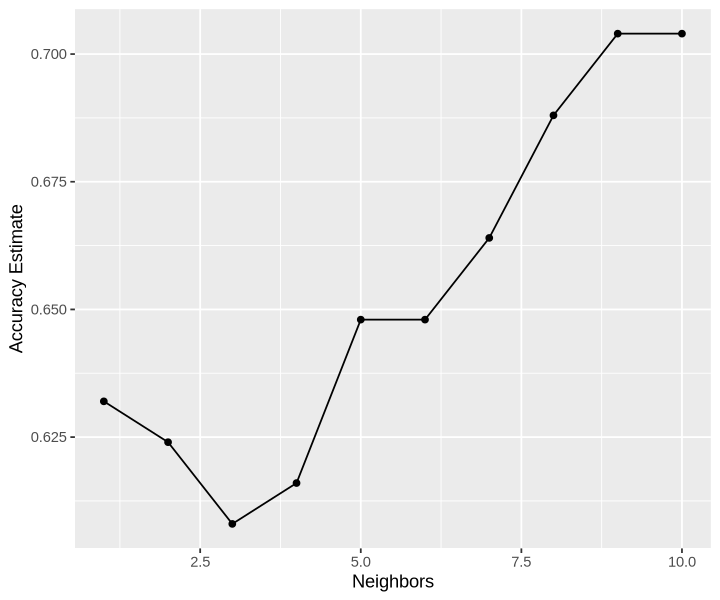

In [27]:
set.seed(9999) 

options(repr.plot.height = 5, repr.plot.width = 6)

data_recipe <- recipe(subscribe ~ count + played_hours, data = onetime_vs_recurring_data_sub) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

data_vfold <- vfold_cv(onetime_vs_recurring_data_sub, v = 5, strata = NULL)

k_vals <- tibble(neighbors = c(seq(from = 1, to = 10, by=1)))

knn_results <- workflow() |>
      add_recipe(data_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = data_vfold, grid = k_vals) |>
      collect_metrics()

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") 


cross_val_plot


- Elbow Plot

num_clusters,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,sse_total,standard,248,1,NA,Preprocessor1_Model01
1,sse_within_total,standard,248,1,NA,Preprocessor1_Model01
2,sse_total,standard,248,1,NA,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,sse_within_total,standard,7.831932,1,NA,Preprocessor1_Model09
10,sse_total,standard,248.000000,1,NA,Preprocessor1_Model10
10,sse_within_total,standard,3.612499,1,NA,Preprocessor1_Model10


num_clusters,total_WSSD
<dbl>,<dbl>
1,248.00000
2,51.85000
3,28.16623
⋮,⋮
8,8.275045
9,7.831932
10,3.612499


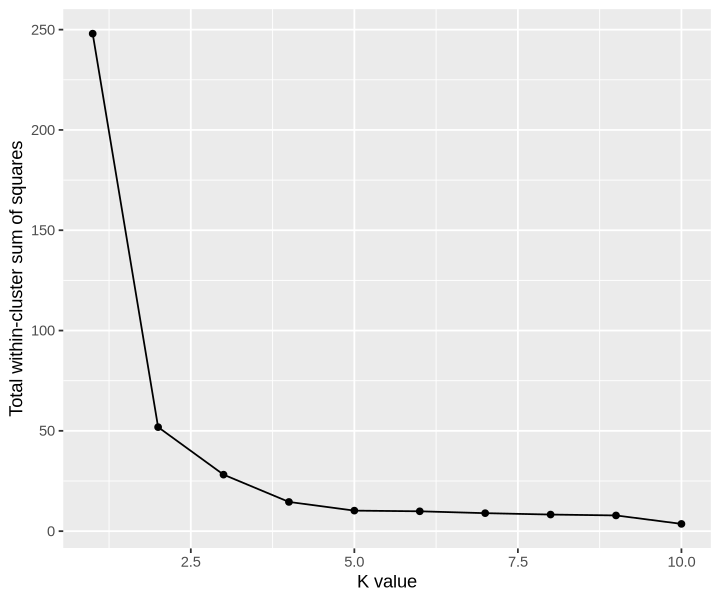

In [29]:
set.seed(9999)
data_recipe_2 <- recipe( ~ count + played_hours , onetime_vs_recurring_data_sub) |> 
       step_scale(all_predictors()) |> 
       step_center(all_predictors()) 

tib_1 <- tibble(num_clusters = c(seq(from = 1, to = 10, by=1)))

spec <- k_means(num_clusters = tune()) |>
       set_engine("stats", nstart = 10)

tune_stats <- workflow() |>
       add_recipe(data_recipe_2) |>
       add_model(spec) |>
       tune_cluster(resamples = apparent(onetime_vs_recurring_data_sub), grid = tib_1) |>
       collect_metrics()
tune_stats
elbow_stats <- tune_stats |>
mutate(total_WSSD = mean) |>
filter(.metric == "sse_within_total") |>
select(num_clusters, total_WSSD)
elbow_stats

elbow_plot <- elbow_stats |>
ggplot(aes(x = num_clusters, y = total_WSSD)) +
geom_point() +
geom_line() +
labs(x = "K value",
     y = "Total within-cluster sum of squares")
elbow_plot

- Found that best-k is 2

# Classification with Best K

In [70]:
data_recipe <- recipe(subscribe ~ count + played_hours, data = onetime_vs_recurring_data_sub) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
      set_engine("kknn") |>
      set_mode("classification")

best_fit <- workflow() |>
      add_recipe(data_recipe) |>
      add_model(knn_spec) |>
      fit(data = onetime_vs_recurring_data_sub)


new_user_1 <- tibble(played_hours = 0,
                        count = 6)

subs_predicted_1 <- predict(best_fit, new_user_1)

subs_predicted_1


.pred_class
<fct>
FALSE


# Plot

.pred_class,hashedEmail,count,experience,subscribe,played_hours,name,gender,Age,player_type,player_type_truth
<fct>,<chr>,<int>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>
FALSE,e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,47,Beginner,FALSE,7.1,Arash,Male,17,recurring,TRUE
FALSE,42eafe96ed5c1684e3b5cc614d1b01a117173d3ec6898abcf1177d9822bd39f7,11,Beginner,FALSE,0.3,Ariana,Female,17,recurring,TRUE
FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,6,Veteran,FALSE,1.4,Aiden,Prefer not to say,25,recurring,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,9955ab948064150d3686ef564389bdc6d6c60bc620a5ce3084b3dec4a7a006a7,1,Amateur,TRUE,0.4,Charlie,Two-Spirited,17,onetime,TRUE
FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1,Pro,FALSE,1.7,Asher,Male,17,onetime,TRUE
FALSE,e44041459da2102dc20147ed6f0db4753547be66fc4ddea037bafca64004de2d,1,Veteran,TRUE,0.4,Gianna,Male,18,onetime,TRUE


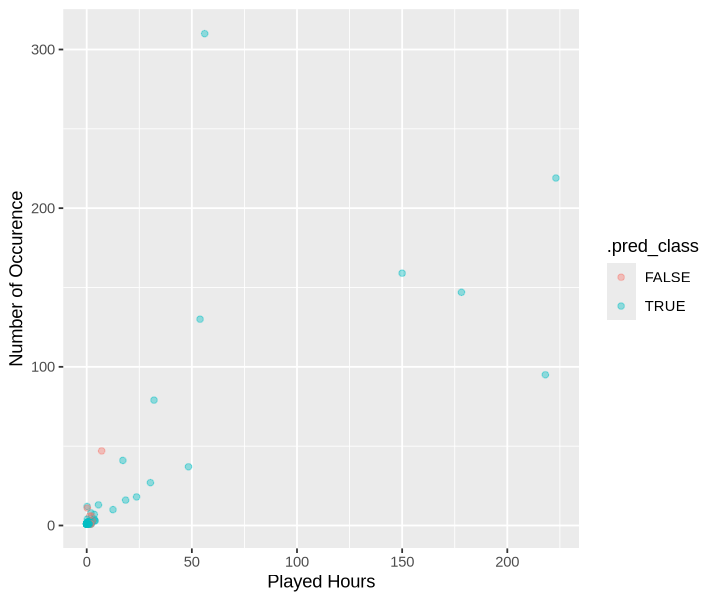

In [63]:
data_preds <- best_fit |>
  predict(onetime_vs_recurring_data_sub) |>
  bind_cols(onetime_vs_recurring_data_sub)

data_preds_false <- data_preds |>
filter(.pred_class == FALSE)
data_preds_false

sub_predictions <- data_preds |>
    ggplot(aes(x = played_hours, y = count, color = .pred_class)) +
        geom_point(alpha = 0.4) +
        xlab("Played Hours") +
        ylab("Number of Occurence") 
sub_predictions

# Plot with X,Y Lim

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


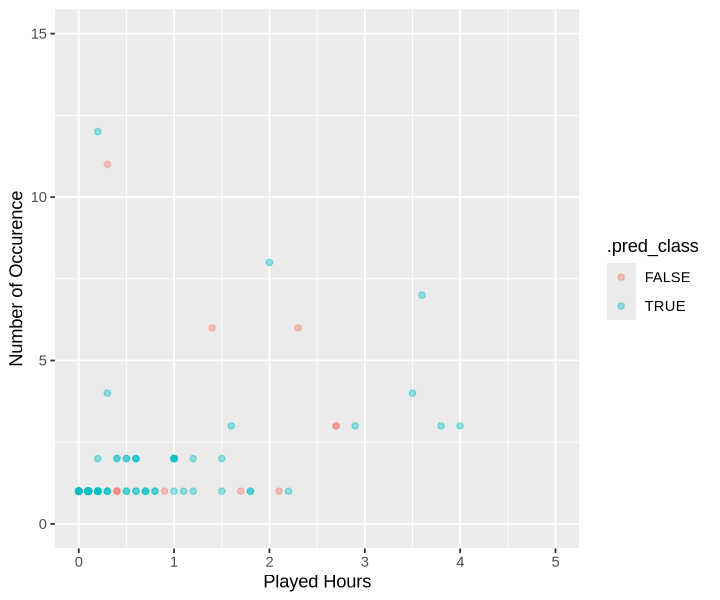

In [79]:
sub_predictions_lim <- data_preds |>
    ggplot(aes(x = played_hours, y = count, color = .pred_class)) +
        geom_point(alpha = 0.4) +
        xlim(0, 5) +
        ylim(0, 15) +
        xlab("Played Hours") +
        ylab("Number of Occurence") 
sub_predictions_lim

## Discussion

* summary of findings
* discuss if results were expected
* impact of the findings
* further questions to ask

## References

* any format so long as its a consistent citation style

In [ ]:
?boxplot